# PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

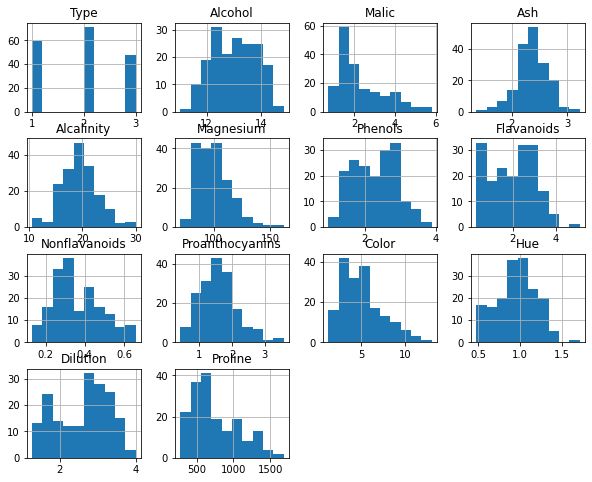

In [7]:
df.hist(figsize=(10,8))
plt.show()

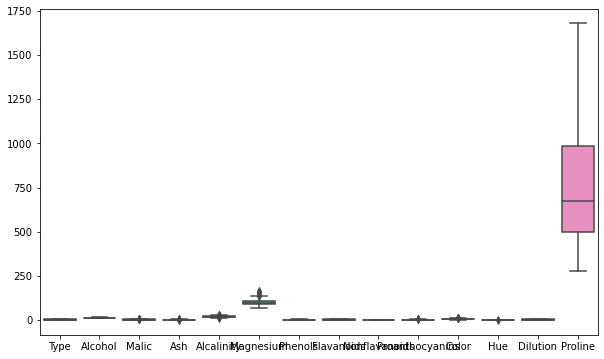

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

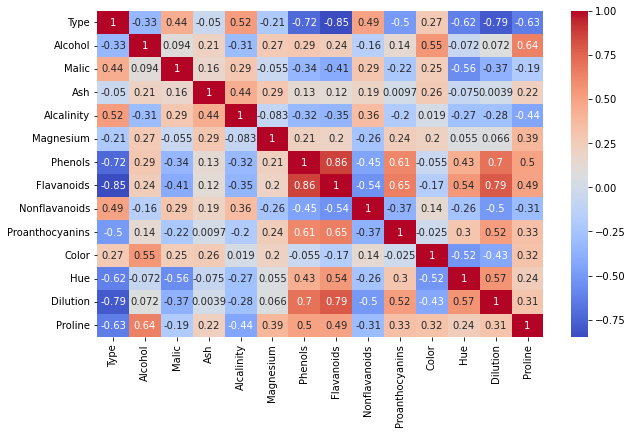

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
if 'Wine' in df.columns:
    X = df.drop('Wine', axis=1)
else:
    X = df.copy()

In [11]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [12]:
pca = PCA()
pca.fit(X_std)
var = pca.explained_variance_ratio_.cumsum()

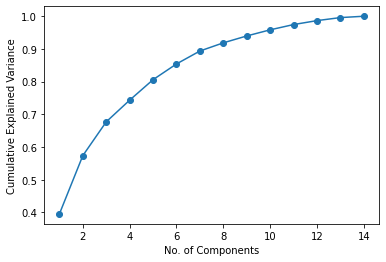

In [13]:
plt.plot(range(1, len(var)+1), var, marker='o')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [14]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_std)

In [15]:
k1 = KMeans(n_clusters=3, random_state=1)
lab1 = k1.fit_predict(X_std)

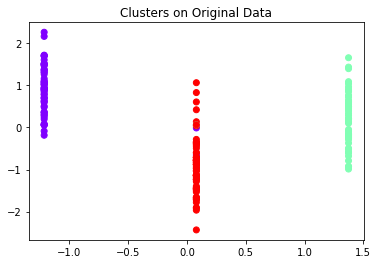

In [16]:
plt.scatter(X_std[:,0], X_std[:,1], c=lab1, cmap='rainbow')
plt.title('Clusters on Original Data')
plt.show()

In [17]:
print("Silhouette:", silhouette_score(X_std, lab1))
print("DB Index:", davies_bouldin_score(X_std, lab1))

Silhouette: 0.30773604383565206
DB Index: 1.316395743411411


In [18]:
k2 = KMeans(n_clusters=3, random_state=1)
lab2 = k2.fit_predict(X_pca)

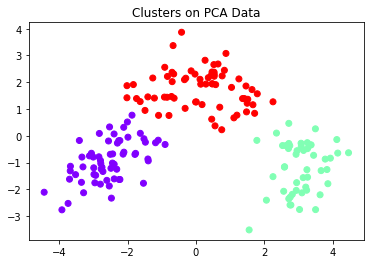

In [19]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=lab2, cmap='rainbow')
plt.title('Clusters on PCA Data')
plt.show()

In [20]:
print("Silhouette:", silhouette_score(X_pca, lab2))
print("DB Index:", davies_bouldin_score(X_pca, lab2))

Silhouette: 0.6024415520362845
DB Index: 0.5397078562575711
